# Project 2: Clustering
## Akhil Avula, Berkin Durmus, Vivek Krishnamurthy, Meet Taraviya 
ECE 219 Winter 2020 \\
Prof.  Vwani Roychowdhury \\
UCLA, Department of ECE

# Dataset: "20 Newsgroups"

In [0]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(categories = categories, subset='all')

computer_tech = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

targets = dataset.target
target_names = dataset.target_names

Y = [1 if target_names[i] in computer_tech else 0 for i in dataset.target]
Y = np.array(Y)

In [0]:
import matplotlib.pyplot as plt

# Part 1: Clustering of Text Data

# Question 1

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=3, token_pattern='[a-z]{3,}')
tfidf = vectorizer.fit_transform(dataset.data).toarray()

print(tfidf.shape)

(7882, 22489)


# Question 2

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=300, n_init=5,random_state=0)
Z = kmeans.fit_predict(tfidf)

# Question 3

Homogeneity                : 0.255
Completeness               : 0.336
V-measure                  : 0.290
Adjusted mutual info score : 0.290
Adjusted Rand Index        : 0.181


[0.25483058162379424,
 0.336445874720274,
 0.2900054518321724,
 0.28993146984373414,
 0.1811937430468142]

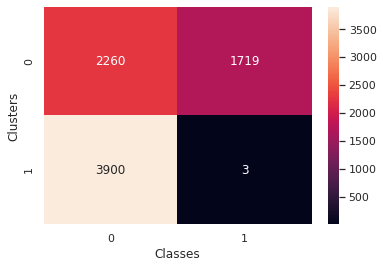

In [0]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
import sklearn.metrics as metrics
import seaborn as sns; sns.set()


def analyze(Y, Z):

  print("Homogeneity                : {:.3f}".format(homogeneity_score(Y, Z)))
  print("Completeness               : {:.3f}".format(completeness_score(Y, Z)))
  print("V-measure                  : {:.3f}".format(v_measure_score(Y, Z)))
  print("Adjusted mutual info score : {:.3f}".format(adjusted_mutual_info_score(Y, Z)))
  print("Adjusted Rand Index        : {:.3f}".format(adjusted_rand_score(Y, Z)))
  cont_mat = contingency_matrix(Y, Z)
  ax = sns.heatmap(cont_mat, annot=True, fmt='d')
  plt.xlabel('Classes')
  plt.ylabel('Clusters')
  return [homogeneity_score(Y, Z), completeness_score(Y, Z), v_measure_score(Y, Z), adjusted_mutual_info_score(Y, Z), adjusted_rand_score(Y, Z)]

analyze(Y, Z)


# Question 4

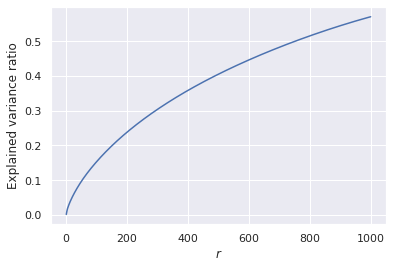

In [0]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

reducer_svd = TruncatedSVD(n_components=1000)
reducer_svd.fit(tfidf)

plt.xlabel("$r$")
plt.ylabel("Explained variance ratio")

plt.plot(np.arange(1,1001), np.cumsum(reducer_svd.explained_variance_ratio_))
plt.show()

# Question 5

Number of components       : 1
Homogeneity                : 0.002
Completeness               : 0.002
V-measure                  : 0.002
Adjusted mutual info score : 0.002
Adjusted Rand Index        : 0.002


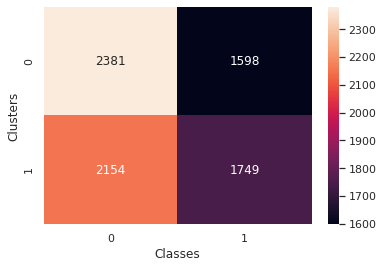

In [0]:
from sklearn.decomposition import NMF
number_of_components = [1, 2, 3, 5, 10, 20, 50, 100, 300]
nmf_scores = []
for n in number_of_components:
  nmf = NMF(n_components=n)
  W = nmf.fit_transform(tfidf)
  kmeans = KMeans(n_clusters=2, max_iter=50, n_init=5)
  Z = kmeans.fit_predict(W)
  plt.clf()
  print("Number of components       :", n)
  nmf_scores.append(analyze(Y, Z))
  plt.show()
  print()

nmf_scores = np.array(nmf_scores)


In [0]:
plt.clf()
plt.xscale('log')
plt.xticks(number_of_components, number_of_components)
plt.xlabel("Number of components (logscale)")
plt.plot(number_of_components, nmf_scores[:,0])
plt.plot(number_of_components, nmf_scores[:,1])
plt.plot(number_of_components, nmf_scores[:,2])
plt.plot(number_of_components, nmf_scores[:,3])
plt.plot(number_of_components, nmf_scores[:,4])
plt.legend(['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Mutual Info Score', 'Adjusted Rand Index'], loc='upper left')

plt.show()

Number of components       : 1
Homogeneity                : 0.002
Completeness               : 0.002
V-measure                  : 0.002
Adjusted mutual info score : 0.002
Adjusted Rand Index        : 0.002


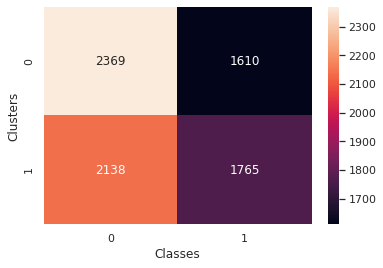


Number of components       : 2
Homogeneity                : 0.601
Completeness               : 0.601
V-measure                  : 0.601
Adjusted mutual info score : 0.601
Adjusted Rand Index        : 0.706


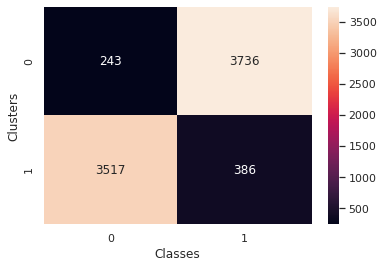


Number of components       : 3
Homogeneity                : 0.601
Completeness               : 0.601
V-measure                  : 0.601
Adjusted mutual info score : 0.601
Adjusted Rand Index        : 0.705


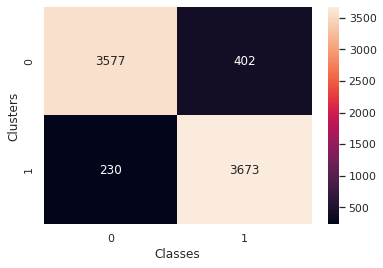


Number of components       : 5
Homogeneity                : 0.228
Completeness               : 0.316
V-measure                  : 0.265
Adjusted mutual info score : 0.265
Adjusted Rand Index        : 0.150


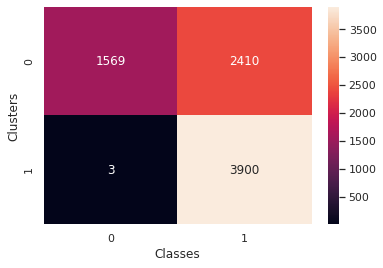


Number of components       : 10
Homogeneity                : 0.234
Completeness               : 0.320
V-measure                  : 0.270
Adjusted mutual info score : 0.270
Adjusted Rand Index        : 0.157


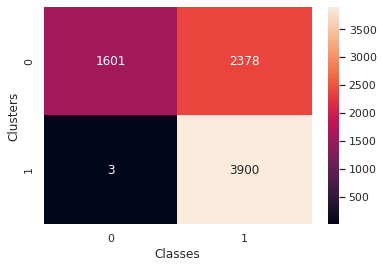


Number of components       : 20
Homogeneity                : 0.237
Completeness               : 0.323
V-measure                  : 0.273
Adjusted mutual info score : 0.273
Adjusted Rand Index        : 0.160


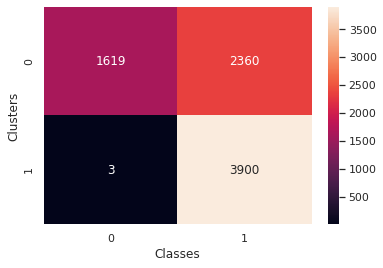


Number of components       : 50
Homogeneity                : 0.242
Completeness               : 0.327
V-measure                  : 0.278
Adjusted mutual info score : 0.278
Adjusted Rand Index        : 0.166


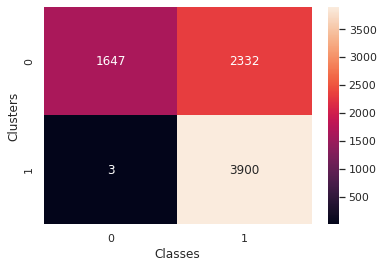


Number of components       : 100
Homogeneity                : 0.242
Completeness               : 0.326
V-measure                  : 0.278
Adjusted mutual info score : 0.278
Adjusted Rand Index        : 0.167


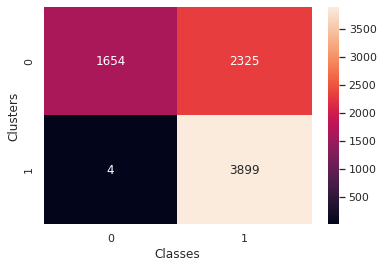


Number of components       : 300
Homogeneity                : 0.240
Completeness               : 0.325
V-measure                  : 0.276
Adjusted mutual info score : 0.276
Adjusted Rand Index        : 0.164


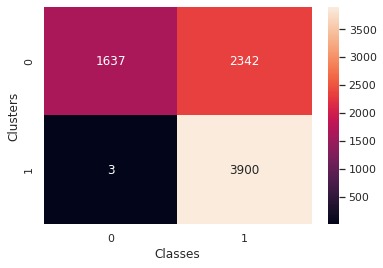

In [0]:
from sklearn.decomposition import TruncatedSVD
number_of_components = [1, 2, 3, 5, 10, 20, 50, 100, 300]
svd_scores = []
for n in number_of_components:
  svd = TruncatedSVD(n_components=n)
  W = svd.fit_transform(tfidf)
  kmeans = KMeans(n_clusters=2, max_iter=50, n_init=30)
  Z = kmeans.fit_predict(W)
  print("Number of components       :", n)
  plt.clf()
  svd_scores.append(analyze(Y, Z))
  plt.show()
  print()

svd_scores = np.array(svd_scores)


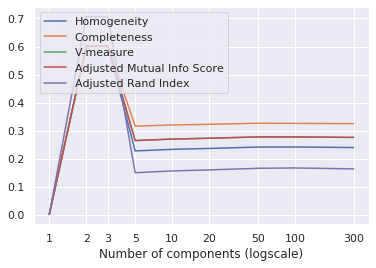

In [0]:
plt.clf()
plt.xscale('log')
plt.xticks(number_of_components, number_of_components)
plt.xlabel("Number of components (logscale)")
plt.plot(number_of_components, svd_scores[:,0])
plt.plot(number_of_components, svd_scores[:,1])
plt.plot(number_of_components, svd_scores[:,2])
plt.plot(number_of_components, svd_scores[:,3])
plt.plot(number_of_components, svd_scores[:,4])
plt.legend(['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Mutual Info Score', 'Adjusted Rand Index'], loc='upper left')

plt.show()

# Question 6

# Question 7

In [0]:
from sklearn.decomposition import PCA
# from sklearn.preprocessing import MinMaxScaler

colours = np.array([[1.,0.,0.,0.1],[0.,1.,1.,0.1]])

# mms_vis = MinMaxScaler()
pca_vis = PCA(n_components=2)
X_pca = pca_vis.fit_transform(mms_vis.fit_transform(tfidf))

In [0]:

def visualize(X,Y,Z, name=None):

  # X_pca = pca_vis.fit_transform(X)
  X_pca = X

  plt.clf()
  plt.scatter(X_pca[:,0],X_pca[:,1],c=colours[Y])

  for i in range(2):
    plt.scatter(X_pca[Y==i,0].mean(),X_pca[Y==i,1].mean(),marker='X',color='black')

  plt.xlabel('Data Points')
  plt.title('Known labels and means')
  if name is None:
    plt.show()
  else:
    plt.savefig(name + '_known.png', bbox_inches='tight', dpi=300)


  plt.clf()
  plt.scatter(X_pca[:,0],X_pca[:,1],c=colours[Z])

  for i in range(2):
    plt.scatter(X_pca[Z==i,0].mean(),X_pca[Z==i,1].mean(),marker='X',color='black')
  
  
  plt.xlabel('Data Points')
  plt.title('Predicted labels and means')
  if name is None:
    plt.show()
  else:
    plt.savefig(name + '_predicted.png', bbox_inches='tight', dpi=300)

In [0]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
r=2 # change after finding best result
reducer_svd = TruncatedSVD(n_components=r)
X_reduced=reducer_svd.fit_transform(tfidf)
BLSI_KM=kmeans.fit(X_reduced)
Z=BLSI_KM.labels_


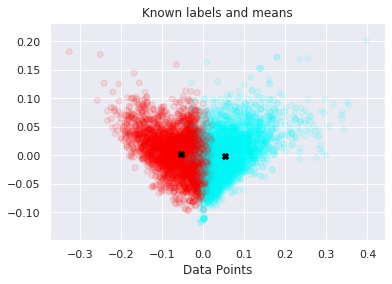

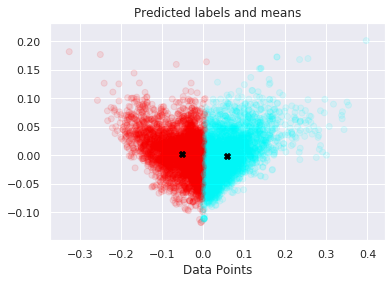

In [0]:
visualize(X_reduced,Y, Z)

In [0]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import numpy as np
r=2 # change after finding best result
reducer_nmf = NMF(n_components=r, random_state=None)

X_reduced=reducer_nmf.fit_transform(tfidf)
BLSI_KM=kmeans.fit(X_reduced)
Z=BLSI_KM.labels_
BLSI_centers=BLSI_KM.cluster_centers_

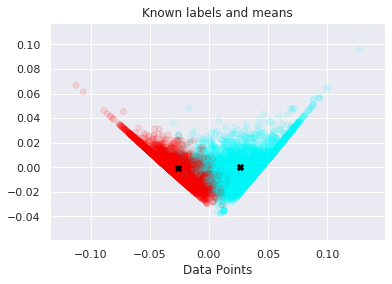

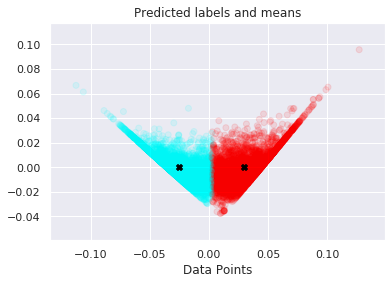

In [0]:
visualize(X_reduced,Y, Z)

# Question 8

TruncatedSVD
TruncatedSVD + StandardScaler
NMF
NMF + StandardScaler
NMF + LogTransform
NMF + StandardScaler + LogTransform
NMF + LogTransform + StandardScaler


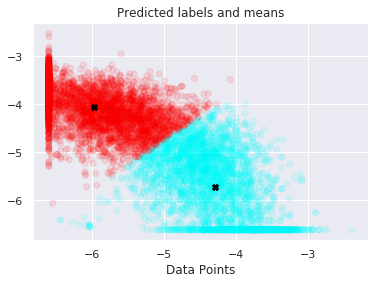

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import numpy as np

def get_fit_transform(X, all_fit_transforms):
  for model in all_fit_transforms:
    X = model.fit_transform(X)
  return X, ' + '.join(list(map(lambda C: type(C).__name__, all_fit_transforms)))

eps = 0.01

class LogTransform:
  def fit_transform(self, X):
    return np.log(X+eps)

all_fit_transform_sets = [
                      [TruncatedSVD(n_components=2)],
                      [TruncatedSVD(n_components=2), StandardScaler(with_mean=False,with_std=True)],
                      [NMF(n_components=2)],
                      [NMF(n_components=2), StandardScaler(with_mean=False,with_std=True)],
                      [NMF(n_components=2), LogTransform()],
                      [NMF(n_components=2), StandardScaler(with_mean=False,with_std=True), LogTransform()],
                      [NMF(n_components=2), LogTransform(), StandardScaler(with_mean=False,with_std=True)],
]

Z_all = []
names = []
X_all = []


for i, all_fit_transform_set in enumerate(all_fit_transform_sets):
  X_processed, name = get_fit_transform(tfidf, all_fit_transform_set)
  

  kmeans = KMeans(n_clusters=2)
  kmeans.fit(X_processed)
  Z = kmeans.labels_
  print(name)
  name = name.replace(' + ', '_')
  names.append(name)
  visualize(X_processed, Y, Z, name=name)
  # plt.savefig(name + '.png', bbox_inches='tight', dpi=300)

  Z_all.append(Z)
  X_all.append(X_processed)

# for X_p, Z, name in zip(X_all, Z_all, names):
#   visualize(X_p, Y, Z, name=name)


# Question 9

In [0]:
# code here

# Question 10

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
import sklearn.metrics as metrics
import seaborn as sns; sns.set()

def measure_cluster(Y,Z, caption):
  print(caption)
  print('Homogeneity SCORE :',metrics.homogeneity_score(Y, Z))
  print('Completeness SCORE :',metrics.completeness_score(Y, Z))
  print('V Measure SCORE :',metrics.v_measure_score(Y, Z))
  print('Adjusted Rand SCORE :',metrics.adjusted_rand_score(Y, Z))
  print('Adjusted Mutual Info SCORE :',metrics.adjusted_mutual_info_score(Y, Z))
  print()



for Z, name in zip(Z_all, names):
  measure_cluster(Y,Z, name)


TruncatedSVD
Homogeneity SCORE : 0.6062952330500854
Completeness SCORE : 0.6074061770021303
V Measure SCORE : 0.606850196582905
Adjusted Rand SCORE : 0.7109276805979646
Adjusted Mutual Info SCORE : 0.6068141706362393

TruncatedSVD_StandardScaler
Homogeneity SCORE : 0.19514681003373713
Completeness SCORE : 0.2258602678210277
V Measure SCORE : 0.2093832293900008
Adjusted Rand SCORE : 0.20459079641572578
Adjusted Mutual Info SCORE : 0.20930556290167932

NMF
Homogeneity SCORE : 0.6486456672384754
Completeness SCORE : 0.6524044142948627
V Measure SCORE : 0.6505196112372318
Adjusted Rand SCORE : 0.7403267209165009
Adjusted Mutual Info SCORE : 0.6504875237016606

NMF_StandardScaler
Homogeneity SCORE : 0.6542151035955867
Completeness SCORE : 0.6594302229346346
V Measure SCORE : 0.6568123113576471
Adjusted Rand SCORE : 0.7394535710958666
Adjusted Mutual Info SCORE : 0.6567807675965129

NMF_LogTransform
Homogeneity SCORE : 0.65456998767524
Completeness SCORE : 0.659969216046011
V Measure SCORE :

# Part 2 - Your Own Dataset

In [0]:
# See other notebook

# Part 3 - Color Clustering

Image shape: (231, 340, 3)
Shape of X matrix: (78540, 3)


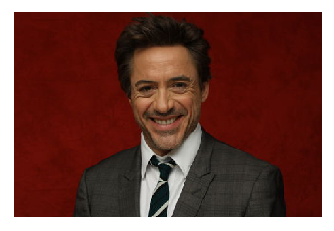

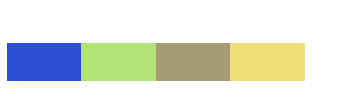

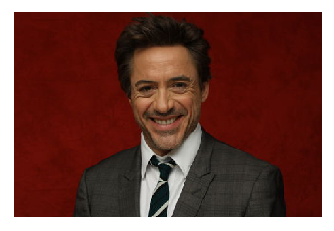

(78540, 3)


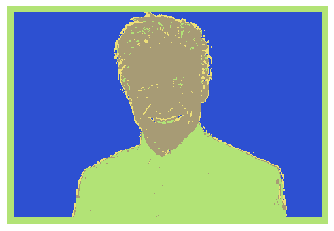

In [0]:
import imageio
import matplotlib.pyplot as plt

def get_img():

  im = imageio.imread('rdj.jpg')

  # X = im / (im.sum(axis=2)[:,:,np.newaxis]+1)
  X = im.transpose(1,2,0)[:,:,:3]
  print("Image shape:", X.shape)
  dims = X.shape[:2]
  X = X.transpose(2,0,1).reshape(3,-1).T

  print("Shape of X matrix:", X.shape)

  return X, dims

def show_img(X, dims):
  X = X.T.reshape(3, *dims).transpose(1, 2, 0)
  plt.axis("off")
  plt.xticks(None)
  plt.grid(None)
  plt.imshow(X)
  plt.show()

colors = np.random.randint(0, 256, size=(4, 3))
img, dims = get_img()
show_img(img, dims)
show_colors(colors)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=100, n_init=30)
X = img[:,:2]/(1+img.sum(axis=1)[:,np.newaxis])
Z = kmeans.fit_predict(X)
import numpy as np

 

def show_clustering(Z, dims):
  img = np.zeros((Z.shape[0], 3), dtype=int)

  for i in range(Z.max()+1):
    img[Z==i] = colors[i]
  
  print(img.shape)
  show_img(img, dims)
  # plt.clf()
  # plt.xlabel("$r$")
  # plt.ylabel("$g$")
  # plt.scatter(X[:,0], X[:,1], c=colors[Z])
  # plt.show()

  return img, colors

def show_colors(colors):
  colors = np.array(colors).T.reshape(3, 1, -1).transpose(1, 2, 0)
  plt.axis("off")
  plt.xticks(None)
  plt.grid(None)
  plt.xlim(-0.5,4*colors.shape[0])
  plt.ylim(0,1)
  plt.imshow(colors.astype(int))
  plt.show()

show_img(img, dims)
img2, colors = show_clustering(Z, dims)



# Question 11 (Bonus)




Image shape: (231, 340, 3)
Shape of X matrix: (78540, 3)


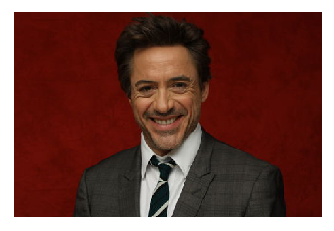

(78540, 3)


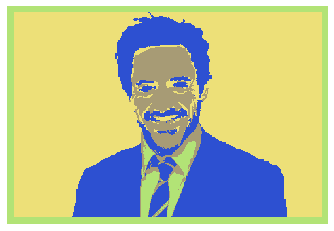

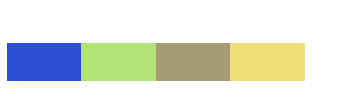

In [0]:
from sklearn.cluster import KMeans
from itertools import product

img, dims = get_img()
kmeans = KMeans(n_clusters=4, max_iter=100, n_init=30)
Xcol = img[:,:3]/255 #/(1+img.sum(axis=1)[:,np.newaxis])
Xpos = (np.array(list(product(*map(np.arange,dims)))) / np.array(dims)) / 3.4
X = np.hstack([Xcol, Xpos])
Z = kmeans.fit_predict(X)
import numpy as np

def show_clustering(Z, dims):
  img = np.zeros((Z.shape[0], 3), dtype=int)

  for i in range(Z.max()+1):
    img[Z==i] = colors[i]
  
  print(img.shape)
  show_img(img, dims)

  
  return img, colors

def show_colors(colors):
  colors = np.array(colors).T.reshape(3, 1, -1).transpose(1, 2, 0)
  plt.axis("off")
  plt.xticks(None)
  plt.grid(None)
  plt.xlim(-0.5,4*colors.shape[0])
  plt.ylim(0,1)
  plt.imshow(colors.astype(int))
  plt.show()

show_img(img, dims)
img2, colors = show_clustering(Z, dims)
show_colors(colors)
